In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('dataset_comb.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [4]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [5]:
df.values.shape

(18185, 12)

In [6]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [50]:
X = df.values[:,:-1]
Y = df.values[:,-1]

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [80]:
fda_scores = cross_val_score(LinearDiscriminantAnalysis(),X,Y,cv=7)
fda_scores = fda_scores*100
np.average(fda_scores)

99.02672385351369

In [74]:
per_scores = cross_val_score(Perceptron(),X,Y,cv=7)
per_scores = per_scores*100
np.average(per_scores)

95.52952609117077

In [75]:
nb_scores = cross_val_score(GaussianNB(),X,Y,cv=7)
nb_scores = nb_scores*100
np.average(nb_scores)

97.99275623672402

In [76]:
lr_scores = cross_val_score(LogisticRegression(solver='liblinear'),X,Y,cv=7)
lr_scores = lr_scores*100
np.average(lr_scores)

97.89397803156795

In [77]:
nn_scores = cross_val_score(MLPClassifier(),X,Y,cv=7)
nn_scores = nn_scores*100
np.average(nn_scores)

93.1705178351913

In [78]:
svm_scores = cross_val_score(SVC(),X,Y,cv=7)
svm_scores = svm_scores*100
np.average(svm_scores)

94.20387777503512

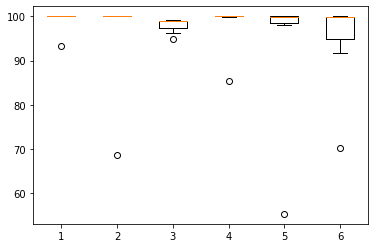

In [81]:
plot.boxplot([fda_scores,per_scores,nb_scores,lr_scores,nn_scores,svm_scores])
plot.show()